### [特征工程之特征选择：](https://www.cnblogs.com/wkslearner/p/8933685.html) && 模型构建

- **特征工程（Feature Engineering）**
    - 什么是**特征工程**，理解其**含义**
    - 对**特征**进行**衍生** 和 **选择**
        - **特征衍生**：
        - **[特征选择](https://blog.csdn.net/Bryan__/article/details/51607215)**：
- **模型构建（Model Construction）**

> ### 特征工程

- **特征工程**是通过对原始数据的处理和加工，将原始数据**属性**通过处理转换为数据**特征**的过程，属性是**数据本身具有的维度**，特征是数据中所呈现出来的某一种重要的特性，通常是通过属性的计算，组合或转换得到的。

> ### 特征衍生 和 特征选择

> 在建模过程中，我们通常会遇到一些问题，现有特征的显著性不高或者特定算法的需要，我们需要从现有数据中构造一些特征，有时又可能因为特征过多，而需要降维处理，一般的方法是从众多特征中提取出特征的共性，然后进行建模。

> #### 特征衍生

> **特征衍生**一般是对原有的特征进行转换，计算以及组合而产生的新的特征

> **单一变量的基础转换**
> **变量通过添加时间维度进行衍生**
> **多变量的运算**

> #### 特征提取

> **特征提取**是通过从原始特征中找出子有效的特征，其目的是降低数据冗余，减少模型计算，发现根由价值的特征

> **线性特征提取**

> **非线性特征提取**

> #### 特征选择

> **特征选择**的一般过程为：先从特征全集中产生出一个特征子集，筛选过程采用某种评价标准，将符合标准的特征筛选出来，同时对筛选出来的特征进行有效性验证。

> 产生的子集一般是一个搜索的过程，搜索空间中的每个状态就是一个特征子集，搜索算法分为完全搜索，启发式搜索和随机搜索。

> 特征选择的过程可分为：**IV值**，**RF随机森林**，**特征过滤**，**Wrapper**，**Ebedded**等

### 任务说明：

- 利用 **金融数据** 来预测贷款用户是否会逾期
- 其中，**“status”** 是结果标签：**0** 表示未逾期，**1** 表示逾期

### 任务要求：

> **模型构建（Model Construction）**


### 任务实现：（2 Days）

> #### **用逻辑回归、SVM、决策树、随机森林和XGBoost进行模型构建，评分方式任意，如准确率等。（不需要考虑模型调参）**

> ### 当[数据预处理](https://blog.csdn.net/zhangyunpeng0922/article/details/84591046?from=groupmessage&isappinstalled=0)完成后，我们需要选择有意义的特征输入机器学习的算法和模型进行训练。

> ### 特征是否发散

> ### 特征 与 目标的相关性

> ### 利用IV值进行特征选择(用[IV值](https://blog.csdn.net/a786150017/article/details/84573202)衡量变量预测能力)

> ###  [WOE(Weight of Evidence)的计算](https://blog.csdn.net/kevin7658/article/details/50780391/)

> **WOEi = ln(pyi/pni) = ln(#yi/#yt)/(#ni/#nt)**

> **等价于**

> **WOEi = ln(pyi/pni) = ln(#yi/#yt)/(#ni/#nt) = ln(#yi/#ni)/(#yt/#nt)**

>**WOE表示的是：“当前分组中响应客户占所有响应客户的比例”和“当前分组中没有响应的客户占所有没有响应的客户的比例”的差异**

> ###  IV的计算

> ### IVi = (pyi - pni)*WOEi

> ### IV即对总的分组个数 IVi求和

In [1]:
import pickle
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score,roc_curve, auc
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import os

In [3]:
data = pd.read_csv('Dataset/data.csv') # 文件的读取
data.drop_duplicates(inplace=True)

# 载入特征
with open('feature.pkl', 'rb') as f:
    X = pickle.load(f)

# 提取标签
y = data.status

# 划分训练集测试集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=2333)

In [4]:
# # 性能评估
# from sklearn.metrics import accuracy_score, roc_auc_score
# # 定义模型指标
# def model_metrics(clf, X_train, X_test, y_train, y_test):
#     # 预测
#     y_train_pred = clf.predict(X_train)
#     y_test_pred = clf.predict(X_test)
    
#     y_train_proba = clf.predict_proba(X_train)[:,1]
#     y_test_proba = clf.predict_proba(X_test)[:,1]
    
#     # 准确率Accuracy
#     print('[准确率]', end = ' ')
#     print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
#     print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
#     # AUC取值
#     print('[auc值]', end = ' ')
#     print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
#     print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))

In [4]:
def model_metrics(clf, X_train, X_test, y_train, y_test):
    # 预测训练集和测试集
    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)
    
    y_train_proba = clf.predict_proba(X_train)[:,1]
    y_test_proba = clf.predict_proba(X_test)[:,1]
    
    # 准确率Accuracy
    print('[准确率]', end = ' ')
    print('训练集：', '%.4f'%accuracy_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%accuracy_score(y_test, y_test_pred))
    
    # 精准率Precision
    print('[精准率]', end = ' ')
    print('训练集：', '%.4f'%precision_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%precision_score(y_test, y_test_pred))

    # 召回率Recall
    print('[召回率]', end = ' ')
    print('训练集：', '%.4f'%recall_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%recall_score(y_test, y_test_pred))
    
    # f1-score
    print('[f1-score]', end = ' ')
    print('训练集：', '%.4f'%f1_score(y_train, y_train_pred), end = ' ')
    print('测试集：', '%.4f'%f1_score(y_test, y_test_pred))
    
    # AUC取值
    print('[auc值]', end = ' ')
    print('训练集：', '%.4f'%roc_auc_score(y_train, y_train_proba), end = ' ')
    print('测试集：', '%.4f'%roc_auc_score(y_test, y_test_proba))
    
    # ROC曲线
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_proba, pos_label = 1)
    fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_test_proba, pos_label = 1)
    
    label = ["Train - AUC:{:.4f}".format(auc(fpr_train, tpr_train)), 
             "Test - AUC:{:.4f}".format(auc(fpr_test, tpr_test))]
    plt.plot(fpr_train,tpr_train)
    plt.plot(fpr_test,tpr_test)
    plt.plot([0, 1], [0, 1], 'd--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(label, loc = 4)
    plt.title("ROC curve")

> ### 利用IV值进行特征选择

In [5]:
import math
import numpy as np
from scipy import stats
from sklearn.utils.multiclass import type_of_target
# WOE的计算
def woe(X, y, event=1):  
    res_woe = []
    iv_dict = {}
    for feature in X.columns:
        x = X[feature].values
        # 1) 连续特征离散化
        if type_of_target(x) == 'continuous':
            x = discrete(x)
        # 2) 计算该特征的woe和iv
        woe_dict, iv = woe_single_x(x, y, feature, event)
        iv_dict[feature] = iv
        res_woe.append(woe_dict) 
        
    return iv_dict

# 离散化处理        
def discrete(x):
    # 使用5等分离散化特征
    res = np.zeros(x.shape)
    for i in range(5):
        point1 = stats.scoreatpercentile(x, i * 20)
        point2 = stats.scoreatpercentile(x, (i + 1) * 20)
        x1 = x[np.where((x >= point1) & (x <= point2))]
        mask = np.in1d(x, x1)
        res[mask] = i + 1    # 将[i, i+1]块内的值标记成i+1
    return res

def woe_single_x(x, y, feature,event = 1):
    # event代表预测正例的标签
    event_total = sum(y == event)
    non_event_total = y.shape[-1] - event_total
    
    iv = 0
    woe_dict = {}
    for x1 in set(x):    # 遍历各个块
        y1 = y.reindex(np.where(x == x1)[0])
        event_count = sum(y1 == event)
        non_event_count = y1.shape[-1] - event_count
        rate_event = event_count / event_total    
        rate_non_event = non_event_count / non_event_total
        
        if rate_event == 0:
            rate_event = 0.0001
            # woei = -20
        elif rate_non_event == 0:
            rate_non_event = 0.0001
            # woei = 20
        woei = math.log(rate_event / rate_non_event)
        woe_dict[x1] = woei
        iv += (rate_event - rate_non_event) * woei
    return woe_dict, iv

In [6]:
import warnings
warnings.filterwarnings("ignore")

iv_dict = woe(X_train, y_train)

In [7]:
iv = sorted(iv_dict.items(), key = lambda x:x[1],reverse = True)
iv

[('historical_trans_amount', 2.6975301004625365),
 ('trans_amount_3_month', 2.5633548887586746),
 ('pawns_auctions_trusts_consume_last_6_month', 2.343990314630991),
 ('repayment_capability', 2.31685232254565),
 ('first_transaction_day', 2.10946672748192),
 ('abs', 2.048054369415617),
 ('consfin_avg_limit', 1.8005797778063934),
 ('consume_mini_time_last_1_month', 1.4570522032774857),
 ('loans_avg_limit', 1.3508993179510962),
 ('max_cumulative_consume_later_1_month', 1.2961861663340406),
 ('historical_trans_day', 1.0794587869439352),
 ('pawns_auctions_trusts_consume_last_1_month', 0.9637730486540506),
 ('consfin_credit_limit', 0.829726960824839),
 ('loans_score', 0.8035125155540374),
 ('loans_latest_day', 0.7177168342745962),
 ('avg_price_last_12_month', 0.6395438326722515),
 ('history_suc_fee', 0.6322293100618446),
 ('apply_score', 0.5592084043426475),
 ('latest_query_day', 0.5017485264222311),
 ('consfin_max_limit', 0.483273473979316),
 ('loans_long_time', 0.4592776814323623),
 ('take_

> ### 模型选择(使用网格搜索)

> ### 利用RF随机森林进行特征选择

In [8]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

袋外分数： 0.737000300571085
[准确率] 训练集： 0.9826 测试集： 0.7737
[精准率] 训练集： 1.0000 测试集： 0.6087
[召回率] 训练集： 0.9310 测试集： 0.2380
[f1-score] 训练集： 0.9642 测试集： 0.3422
[auc值] 训练集： 0.9997 测试集： 0.7088


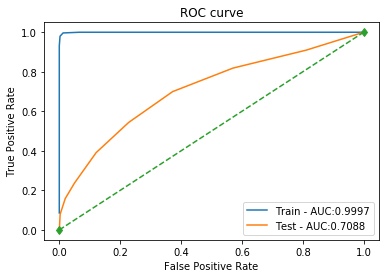

In [9]:
# 观察默认参数的性能
rf0 = RandomForestClassifier(oob_score=True, random_state=2333)
rf0.fit(X_train, y_train)
print('袋外分数：', rf0.oob_score_)
model_metrics(rf0, X_train, X_test, y_train, y_test)

In [10]:
# 网格法调参
param_test = {'n_estimators':range(20,200,20)}
gsearch = GridSearchCV(estimator = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50, 
                                                          min_samples_leaf=20, max_features = 9,random_state=2333), 
                       param_grid = param_test, scoring='roc_auc', cv=5)

gsearch.fit(X_train, y_train)
gsearch.best_params_, gsearch.best_score_

({'n_estimators': 180}, 0.7855386529283339)

袋外分数： 0.7835888187556357
[准确率] 训练集： 0.8118 测试集： 0.7940
[精准率] 训练集： 0.8794 测试集： 0.8242
[召回率] 训练集： 0.2952 测试集： 0.2125
[f1-score] 训练集： 0.4421 测试集： 0.3378
[auc值] 训练集： 0.8952 测试集： 0.7883


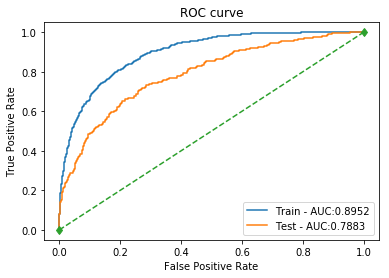

In [11]:
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2333)
rf.fit(X_train, y_train)
print('袋外分数：', rf.oob_score_)
model_metrics(rf, X_train, X_test, y_train, y_test)

> ### 平均不纯度减少(基于Gini系数的计算)

In [12]:
rf.fit(X_train, y_train)
feature_impotance1 = sorted(zip(map(lambda x: '%.4f'%x, rf.feature_importances_), list(X_train.columns)), reverse=True)

In [13]:
feature_impotance1[:10]

[('0.1312', 'trans_fail_top_count_enum_last_1_month'),
 ('0.0810', 'loans_score'),
 ('0.0773', 'history_fail_fee'),
 ('0.0621', 'apply_score'),
 ('0.0570', 'latest_one_month_fail'),
 ('0.0427', 'loans_overdue_count'),
 ('0.0311', 'trans_fail_top_count_enum_last_12_month'),
 ('0.0232', 'trans_fail_top_count_enum_last_6_month'),
 ('0.0208', 'trans_day_last_12_month'),
 ('0.0190', 'max_cumulative_consume_later_1_month')]

> ### 平均精确率减少

In [14]:
import numpy as np
from collections import defaultdict
from sklearn.model_selection import cross_val_score, ShuffleSplit

scores = defaultdict(list)
rs = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
for train_idx, test_idx in rs.split(X_train):
    x_train, x_test = X_train.values[train_idx], X_train.values[test_idx]
    Y_train, Y_test = y_train.values[train_idx], y_train.values[test_idx]
    r = rf.fit(x_train, Y_train)
    acc = accuracy_score(Y_test, rf.predict(x_test))
    for i in range(x_train.shape[1]):
        X_t = x_test.copy()
        np.random.shuffle(X_t[:, i])
        shuff_acc = accuracy_score(Y_test, rf.predict(X_t))
        scores[X_train.columns[i]].append((acc - shuff_acc) / acc)
        
feature_impotance2=sorted([('%.4f'%np.mean(score), feat) for feat, score in scores.items()], reverse=True)

In [15]:
feature_impotance2[:10]

[('0.0171', 'history_fail_fee'),
 ('0.0118', 'loans_score'),
 ('0.0099', 'trans_fail_top_count_enum_last_1_month'),
 ('0.0099', 'latest_one_month_fail'),
 ('0.0074', 'apply_score'),
 ('0.0036', 'trans_day_last_12_month'),
 ('0.0031', 'max_cumulative_consume_later_1_month'),
 ('0.0028', 'rank_trad_1_month'),
 ('0.0023', 'top_trans_count_last_1_month'),
 ('0.0023', 'pawns_auctions_trusts_consume_last_1_month')]

> ### 选择重要特征

In [16]:
feature_impotance1[50], feature_impotance2[40]

(('0.0048', 'number_of_trans_from_2011'),
 ('0.0003', 'number_of_trans_from_2011'))

In [17]:
useless = []
for feature in X_train.columns:
    if feature in [t[1] for t in feature_impotance1[50:]] and feature in [t[1] for t in feature_impotance2[40:]]:
        useless.append(feature)
        print(feature, iv_dict[feature])

student_feature 0.1973961955679536
is_high_user 0.19615128275454694
avg_consume_less_12_valid_month 0.22239702810015521
first_transaction_time_year 0.2046103090844746
first_transaction_time_month 0.21771183020755758
latest_query_time_year 0.19785800765281902
latest_query_time_month 0.22281703262580477
latest_query_time_day 0.3201102732169854
loans_latest_time_year 0.19963733017168203
loans_latest_time_month 0.23536009610676906
number_of_trans_from_2011 0.3424276547627279
consume_top_time_last_6_month 0.349022605284868
cross_consume_count_last_1_month 0.23101341148565974
max_consume_count_later_6_month 0.25742951507849315
railway_consume_count_last_12_month 0.2003683041664725
jewelry_consume_count_last_6_month 0.21790403970323896
apply_credibility 0.29830373382617764
query_org_count 0.284857522455637
latest_one_month_apply 0.2764096502289849
latest_six_month_apply 0.3167512025877789
loans_credibility_behavior 0.23537823783293418
consfin_org_count_behavior 0.22010497210894556
loans_cash_

In [18]:
len(useless)

29

In [19]:
X_train.drop(useless, axis = 1, inplace = True)
X_test.drop(useless, axis = 1, inplace = True)

袋外分数： 0.78809738503156
[准确率] 训练集： 0.8185 测试集： 0.7926
[精准率] 训练集： 0.8665 测试集： 0.7522
[召回率] 训练集： 0.3321 测试集： 0.2408
[f1-score] 训练集： 0.4802 测试集： 0.3648
[auc值] 训练集： 0.8943 测试集： 0.7926


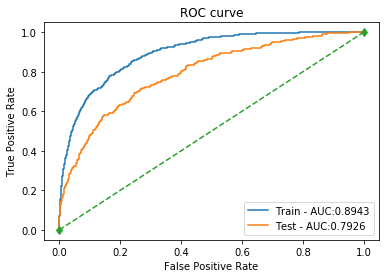

In [20]:
rf = RandomForestClassifier(n_estimators=120, max_depth=9, min_samples_split=50,
                            min_samples_leaf=20, max_features = 9,oob_score=True, random_state=2333)
rf.fit(X_train, y_train)
print('袋外分数：', rf.oob_score_)
model_metrics(rf, X_train, X_test, y_train, y_test)

In [21]:
from sklearn.preprocessing import StandardScaler

# 特征归一化
std = StandardScaler()
X_train = std.fit_transform(X_train.values)
X_test = std.transform(X_test.values)

## 模型构建

> #### 用逻辑回归LR、SVM和决策树DT、随机森林RF和XGBoost等机器学习算法进行模型构建

> #### 利用LR逻辑回归进行模型构建

> **from sklearn.linear_model import LogisticRegression**

> **lr = LogisticRegression()**

> **lr.fit(X_train, y_train)**

> #### 利用 SVM 进行模型构建

> **from sklearn import svm**

> **线性核函数**

> **svm_linear = svm.SVC(kernel = 'linear', probability=True).fit(X_train, y_train)**

> **多元线性核函数**

> **svm_poly = svm.SVC(kernel = 'poly', probability=True).fit(X_train, y_train)**

> **径向基函数**

> **svm_rbf = svm.SVC(probability=True).fit(X_train, y_train)**

> **非线性sigmoid核函数**

> **svm_sigmoid = svm.SVC(kernel = 'sigmoid',probability=True).fit(X_train, y_train)**

> #### 利用 Decision Tree 进行模型构建

> **from sklearn.tree import DecisionTreeClassifier**

> **dt = DecisionTreeClassifier(max_depth=4)**

> **dt.fit(X_train, y_train)**

> #### 利用 Random Forests 进行模型构建

> **from sklearn.tree import DecisionTreeClassifier**

> **dt = DecisionTreeClassifier(max_depth=5,min_samples_split=50,min_samples_leaf=60, **

> **max_features=9, random_state =2018)**

> #### 利用 XGBoost 进行模型构建

> **from xgboost.sklearn import XGBClassifier**

> **xgb = XGBClassifier(learning_rate =0.1, n_estimators=80, max_depth=3, min_child_weight=5,\
                    gamma=0.2, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-5,\
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27)**

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier

In [23]:
lr = LogisticRegression(C = 0.1, penalty = 'l1')
svm_linear = svm.SVC(C = 0.01, kernel = 'linear', probability=True)
svm_poly =  svm.SVC(C = 0.01, kernel = 'poly', probability=True)
svm_rbf =  svm.SVC(gamma = 0.01, C =0.01 , probability=True)
svm_sigmoid =  svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)
dt = DecisionTreeClassifier(max_depth=5,min_samples_split=50,min_samples_leaf=60, max_features=9, random_state =2018)
xgb = XGBClassifier(learning_rate =0.1, n_estimators=80, max_depth=3, min_child_weight=5,\
                    gamma=0.2, subsample=0.8, colsample_bytree=0.8, reg_alpha=1e-5,\
                    objective= 'binary:logistic', nthread=4,scale_pos_weight=1, seed=27)

[准确率] 训练集： 0.7938 测试集： 0.8108
[精准率] 训练集： 0.7059 测试集： 0.7578
[召回率] 训练集： 0.3143 测试集： 0.3456
[f1-score] 训练集： 0.4349 测试集： 0.4747
[auc值] 训练集： 0.7978 测试集： 0.8031


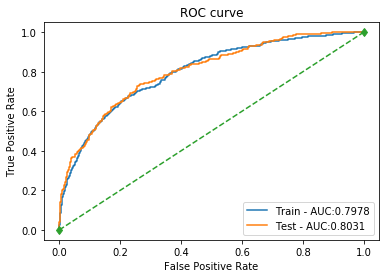

In [24]:
lr.fit(X_train, y_train.values)
model_metrics(lr, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7839 测试集： 0.7898
[精准率] 训练集： 0.7713 测试集： 0.8046
[召回率] 训练集： 0.2048 测试集： 0.1983
[f1-score] 训练集： 0.3236 测试集： 0.3182
[auc值] 训练集： 0.8000 测试集： 0.8123


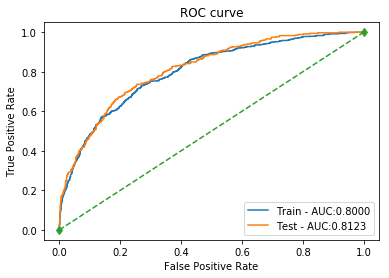

In [25]:
svm_linear.fit(X_train, y_train.values)
model_metrics(svm_linear, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7550 测试集： 0.7589
[精准率] 训练集： 0.9630 测试集： 0.8462
[召回率] 训练集： 0.0310 测试集： 0.0312
[f1-score] 训练集： 0.0600 测试集： 0.0601
[auc值] 训练集： 0.8458 测试集： 0.7405


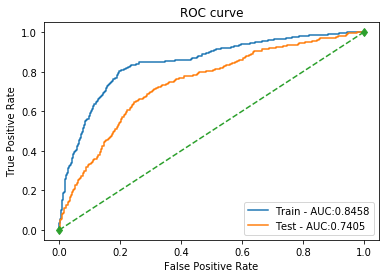

In [26]:
svm_poly.fit(X_train, y_train.values)
model_metrics(svm_poly, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7475 测试集： 0.7526
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.8271 测试集： 0.8013


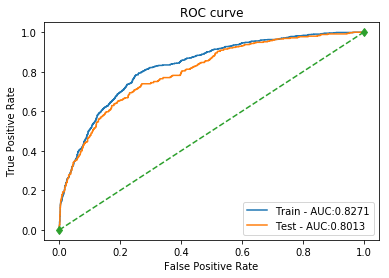

In [27]:
svm_rbf.fit(X_train, y_train.values)
model_metrics(svm_rbf, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7475 测试集： 0.7526
[精准率] 训练集： 0.0000 测试集： 0.0000
[召回率] 训练集： 0.0000 测试集： 0.0000
[f1-score] 训练集： 0.0000 测试集： 0.0000
[auc值] 训练集： 0.7720 测试集： 0.7978


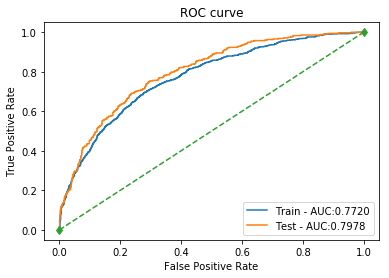

In [28]:
svm_sigmoid.fit(X_train, y_train.values)
model_metrics(svm_sigmoid, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.7704 测试集： 0.7722
[精准率] 训练集： 0.6050 测试集： 0.6029
[召回率] 训练集： 0.2607 测试集： 0.2323
[f1-score] 训练集： 0.3644 测试集： 0.3354
[auc值] 训练集： 0.7458 测试集： 0.7029


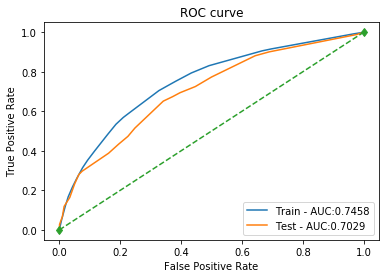

In [29]:
dt.fit(X_train, y_train.values)
model_metrics(dt, X_train, X_test, y_train, y_test)

[准确率] 训练集： 0.8383 测试集： 0.7989
[精准率] 训练集： 0.8254 测试集： 0.6875
[召回率] 训练集： 0.4560 测试集： 0.3428
[f1-score] 训练集： 0.5874 测试集： 0.4575
[auc值] 训练集： 0.8876 测试集： 0.7998


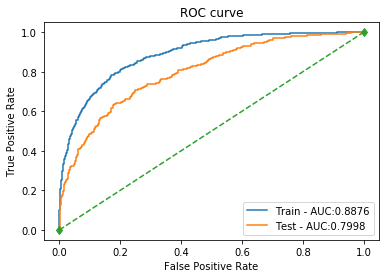

In [30]:
xgb.fit(X_train, y_train.values)
model_metrics(xgb, X_train, X_test, y_train, y_test)

> ### Discussion SVM_Linear_Keenel vs. XGBoost

|模型|参数|准确率|精确率|召回率|F1-Score|AUC取值|
|:---|:---|:---|:---|:---|:---|:---|
|LR|LogisticRegression(C = 0.1, penalty = 'l1')|训练集：0.7938 测试集：0.8108|训练集：0.7059 测试集：0.7578|训练集：0.3143 测试集：0.3456|训练集：0.4349 测试集：0.4747|训练集：0.7978 测试集：0.8031|
|svm_linear|svm.SVC(C = 0.01, kernel = 'linear', probability=True)|训练集： 0.7839 测试集： 0.7898|训练集： 0.7713 测试集： 0.8046|训练集： 0.2048 测试集： 0.1983|训练集： 0.3236 测试集： 0.3182|训练集： 0.8000 测试集： 0.8123|
|svm_poly|svm.SVC(C = 0.01, kernel = 'poly', probability=True)|训练集： 0.7550 测试集： 0.7589|训练集： 0.9630 测试集： 0.8462|训练集： 0.0310 测试集： 0.0312|训练集： 0.0600 测试集： 0.0601|训练集： 0.8458 测试集： 0.7405|
|svm_rbf|svm.SVC(gamma = 0.01, C =0.01 , probability=True)|训练集： 0.7475 测试集： 0.7526|训练集： 0.0000 测试集： 0.0000|训练集： 0.0000 测试集： 0.0000|训练集： 0.8271 测试集： 0.8013|训练集： 0.8271 测试集： 0.8013|
|svm_sigmoid|svm.SVC(C = 0.01, kernel = 'sigmoid',probability=True)|训练集： 0.7475 测试集： 0.7526|训练集： 0.0000 测试集： 0.0000|训练集： 0.0000 测试集： 0.0000|训练集： 0.7720 测试集： 0.7978|训练集： 0.7720 测试集： 0.7978|
|决策树|DecisionTreeClassifier(max_depth=11,min_samples_split=550,min_samples_leaf=80,max_features=19)|训练集： 0.7704 测试集： 0.7722|训练集： 0.6050 测试集： 0.6029|训练集： 0.2607 测试集： 0.2323|训练集： 0.3644 测试集： 0.3354|训练集： 0.7458 测试集： 0.7029|
|XGBoost|XGBClassifier(learning_rate =0.01, n_estimators=180, max_depth=3, min_child_weight=5,gamma=0.4, subsample=0.5, colsample_bytree=0.9, reg_alpha=1, objective= 'binary:logistic',nthread=4,scale_pos_weight=1, seed=27)|训练集： 0.8383 测试集： 0.7989|训练集： 0.8254 测试集： 0.6875|训练集： 0.4560 测试集： 0.3428|训练集： 0.8876 测试集： 0.7998|训练集： 0.8876 测试集： 0.7998|

> #### 利用不同的数据挖掘算法，构建不同的模型，通过对比它们之间的差异，可以进一步考虑产生这种差异的原因

### Conclusion

> ### 模型构建的过程关键在于选择合理的数据挖掘算法

> ### 模型调参对模型的评估也至关重要，选取合适的模型参数是下一阶段的关注点